# COVID-19 Analysis & Visualizations

### Import necessary tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

warnings.filterwarnings("ignore")

### Load dataset

In [2]:
path_to_dataset = 'novel-corona-virus-2019-dataset'

In [3]:
data = pd.read_csv(f'{path_to_dataset}/covid_19_data.csv')

### Dataset info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 8 columns):
SNo                6722 non-null int64
ObservationDate    6722 non-null object
Province/State     3956 non-null object
Country/Region     6722 non-null object
Last Update        6722 non-null object
Confirmed          6722 non-null float64
Deaths             6722 non-null float64
Recovered          6722 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 420.2+ KB


In [5]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,6722.000000,6722.000000,6722.000000,6722.000000
mean,3361.500000,601.195924,19.855846,226.341267
std,1940.618587,4896.332140,204.486922,2556.035202
min,1.000000,0.000000,0.000000,0.000000
25%,1681.250000,2.000000,0.000000,0.000000
50%,3361.500000,13.000000,0.000000,0.000000
75%,5041.750000,108.000000,1.000000,11.000000
max,6722.000000,67800.000000,3122.000000,56927.000000


In [6]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Preprocessing

### Missing values

In [7]:
data.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     2766
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

We're missing 2462 values from `Province/State` column

In [8]:
# Filling null values with `Unknown`
data.fillna('Unknown', inplace=True)

In [9]:
data.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

### Renaming columns

In [10]:
data.rename(columns={'ObservationDate': 'Observed', 'Last Update': 'Updated'}, inplace=True)

In [11]:
data.tail()

,SNo,Observed,Province/State,Country/Region,Updated,Confirmed,Deaths,Recovered
6717,6718,03/18/2020,Unknown,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,6719,03/18/2020,Unknown,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,6720,03/18/2020,Unknown,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,6721,03/18/2020,Unknown,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
6721,6722,03/18/2020,Unknown,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


### Normalizing dates

In [12]:
data['Observed'] = data['Observed'].apply(pd.to_datetime)
data['Updated'] = data['Updated'].apply(pd.to_datetime)

In [13]:
data.head()

,SNo,Observed,Province/State,Country/Region,Updated,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


### Processing columns

In [14]:
data.drop(['SNo'], axis=1, inplace=True) # We don't need this column
data['Non_recovered'] = data['Confirmed'] - data['Recovered'] - data['Deaths'] # Non recovered cases

## Analysis & Visualizations

In [15]:
total_cases = data.groupby(['Observed']).sum().reset_index()
total_cases.style.background_gradient(cmap='Reds')

,Observed,Confirmed,Deaths,Recovered,Non_recovered
0,2020-01-22 00:00:00,555,17,28,510
1,2020-01-23 00:00:00,653,18,30,605
2,2020-01-24 00:00:00,941,26,36,879
3,2020-01-25 00:00:00,1438,42,39,1357
4,2020-01-26 00:00:00,2118,56,52,2010
5,2020-01-27 00:00:00,2927,82,61,2784
6,2020-01-28 00:00:00,5578,131,107,5340
7,2020-01-29 00:00:00,6165,133,126,5906
8,2020-01-30 00:00:00,8235,171,143,7921
9,2020-01-31 00:00:00,9925,213,222,9490


In [16]:
observed_list = total_cases['Observed'].tolist()
print('First Observabled Date:', observed_list[0].strftime('%b %d, %Y'))
print('Last Observabled Date:', observed_list[-1].strftime('%b %d, %Y'))
print('Total days observed:', len(observed_list))

First Observabled Date: Jan 22, 2020
Last Observabled Date: Mar 18, 2020
Total days observed: 57


Text(0.5, 1.0, 'Total Cases in the World')

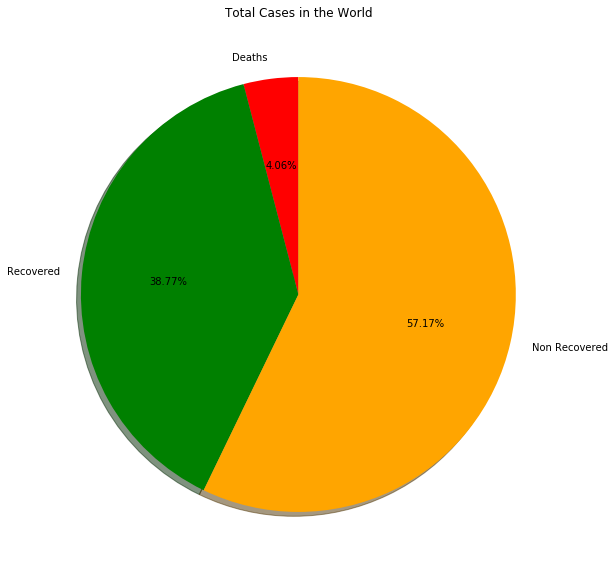

In [17]:
values = total_cases.drop(['Observed', 'Confirmed'], axis=1)[-1:].values.transpose()
plt.figure(figsize=(10,10))
plt.pie(values, 
        labels=['Deaths', 'Recovered', 'Non Recovered'], 
        colors=['red', 'green', 'orange'],
        autopct='%.2f%%', 
        startangle=90, 
        shadow=True)
plt.title('Total Cases in the World')

Text(0, 0.5, 'Cases')

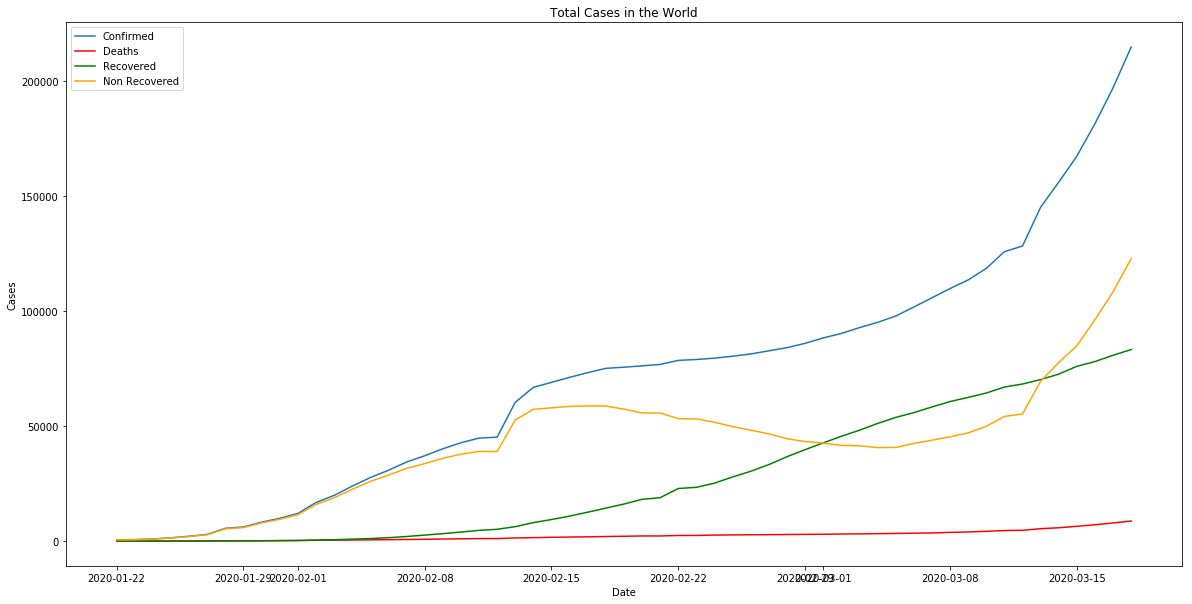

In [18]:
plt.figure(figsize=(20,10))
sns.lineplot(total_cases['Observed'], total_cases['Confirmed'])
sns.lineplot(total_cases['Observed'], total_cases['Deaths'], color='red')
sns.lineplot(total_cases['Observed'], total_cases['Recovered'], color='green')
sns.lineplot(total_cases['Observed'], total_cases['Non_recovered'], color='orange')
plt.legend(['Confirmed', 'Deaths', 'Recovered', 'Non Recovered'])
plt.title('Total Cases in the World')
plt.xlabel('Date')
plt.ylabel('Cases')

Text(0, 0.5, 'Rate')

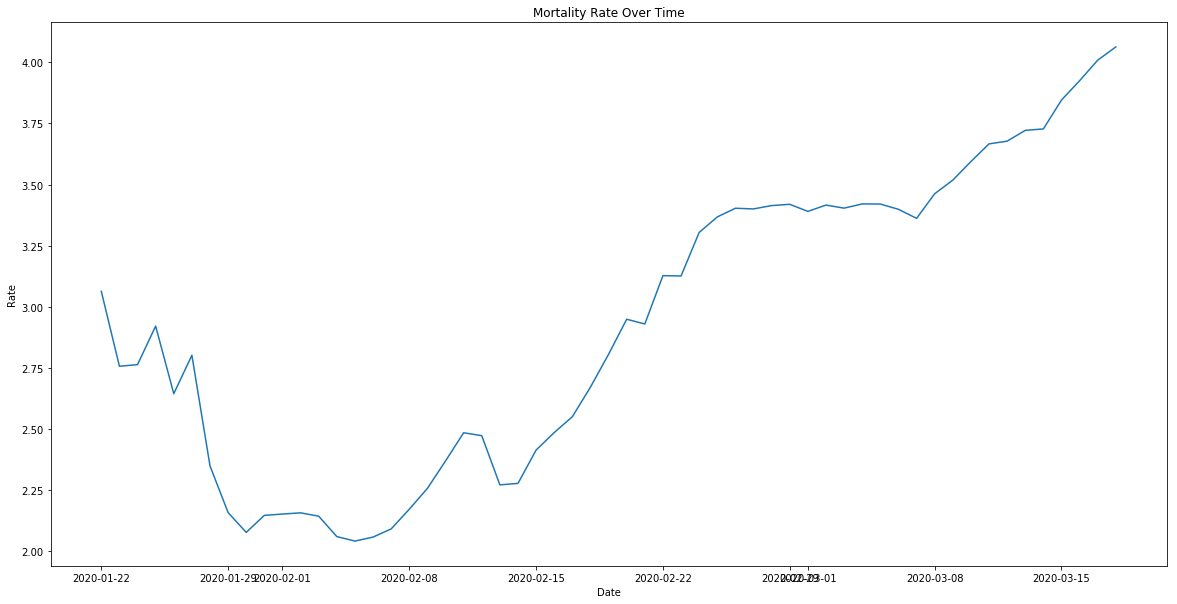

In [19]:
plt.figure(figsize=(20,10))
sns.lineplot(total_cases['Observed'], total_cases['Deaths']*100/total_cases['Confirmed'])
plt.title('Mortality Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')

Text(0, 0.5, 'Rate')

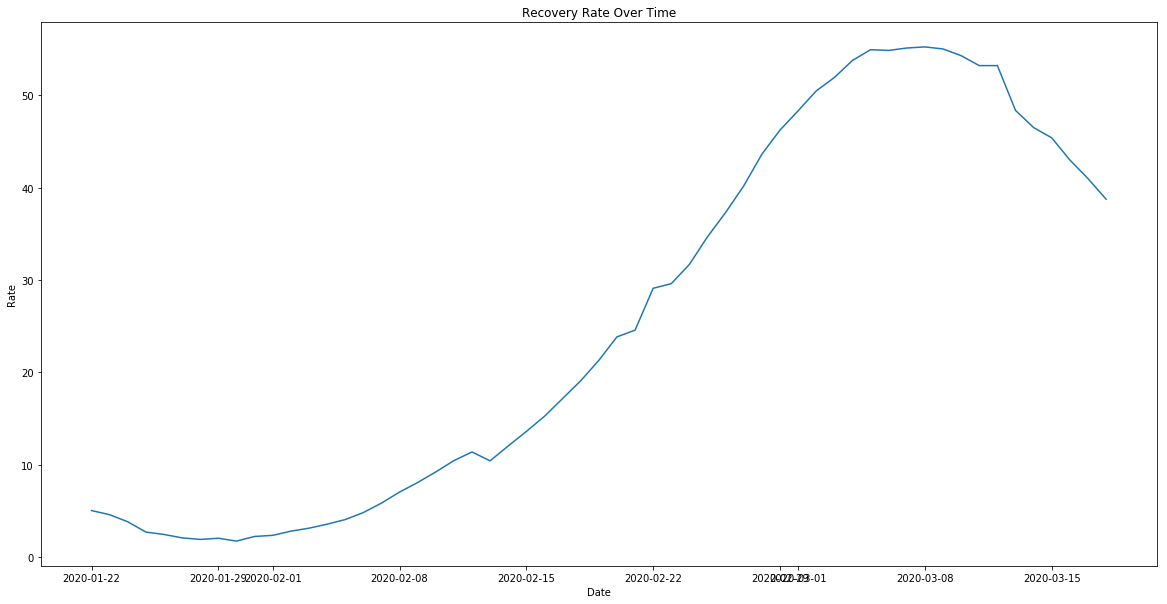

In [20]:
plt.figure(figsize=(20,10))
sns.lineplot(total_cases['Observed'], total_cases['Recovered']*100/total_cases['Confirmed'])
plt.title('Recovery Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')

In [21]:
dictByLastDate = {'Confirmed': total_cases['Confirmed'].tolist()[-1], 
                  'Deaths': total_cases['Deaths'].tolist()[-1], 
                  'Recovered': total_cases['Recovered'].tolist()[-1], 
                  'Non Recovered': total_cases['Non_recovered'].tolist()[-1]}

total_column = 'Total cases by ' + observed_list[-1].strftime('%b %d, %Y')
total_data = pd.DataFrame.from_dict(dictByLastDate, 
                                    orient='index', 
                                    columns=[total_column])

total_data.style.background_gradient(cmap='Reds')

,"Total cases by Mar 18, 2020"
Confirmed,214915
Deaths,8733
Recovered,83313
Non Recovered,122869


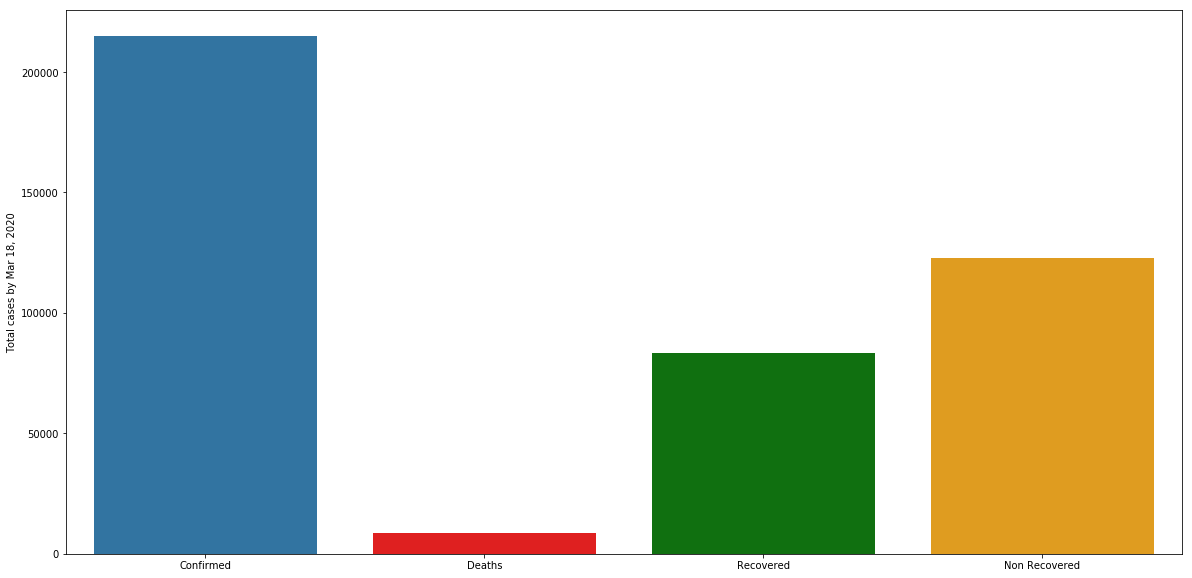

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(total_data.index, total_data[total_column], palette=['#1f77b4', 'red', 'green', 'orange'])

Text(0, 0.5, 'Cases')

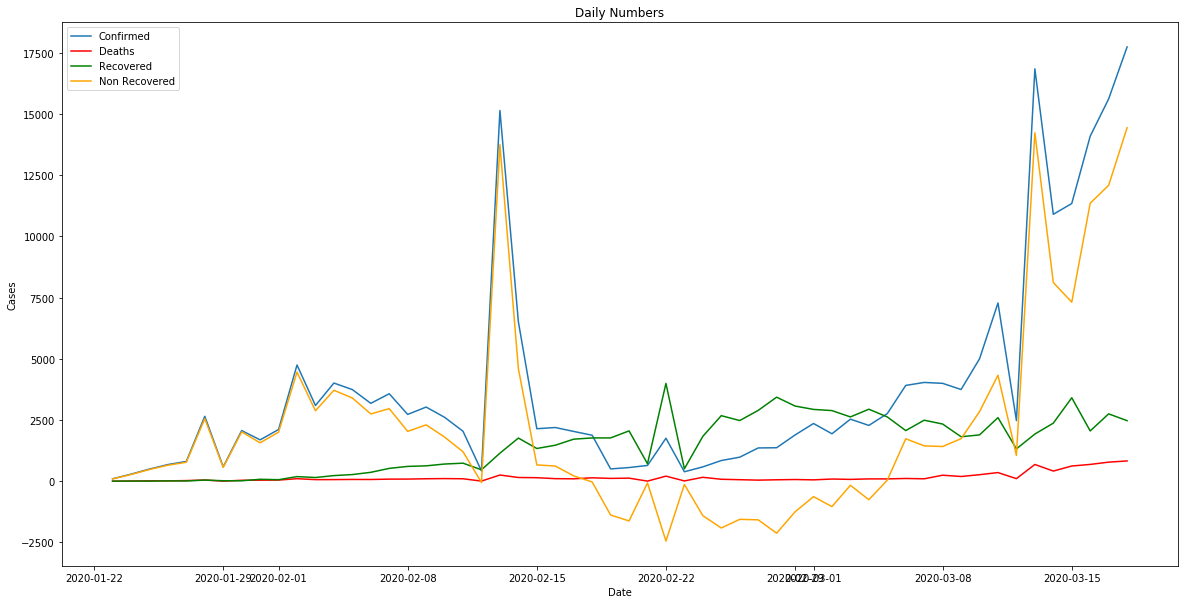

In [23]:
plt.figure(figsize=(20,10))
sns.lineplot(total_cases['Observed'], total_cases['Confirmed'].diff())
sns.lineplot(total_cases['Observed'], total_cases['Deaths'].diff(), color='red')
sns.lineplot(total_cases['Observed'], total_cases['Recovered'].diff(), color='green')
sns.lineplot(total_cases['Observed'], total_cases['Non_recovered'].diff(), color='orange')
plt.legend(['Confirmed', 'Deaths', 'Recovered', 'Non Recovered'])
plt.title('Daily Numbers')
plt.xlabel('Date')
plt.ylabel('Cases')